In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
from pylab import *
import datetime

# Data Cleaning and Preparation

In [2]:
## loading data, encoding formats
df = pd.read_csv('~/Desktop/ecommerce_data.csv', encoding= 'unicode_escape')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
##check out missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
##cheching out the rows with missing value
df[df.isna().any(axis = 1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [6]:
##drop all the missing values
df.dropna(how = 'any', inplace = True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format = '%m/%d/%Y %H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# convert column type - string to integer type
df['CustomerID'] = df['CustomerID'].astype('int64')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [10]:
##add month_year column
df['Month_Year'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')

# ## add day column 
df['day_of_week'] = df['InvoiceDate'].dt.day_name()

##add time column
df['Hour'] = pd.to_datetime(df['InvoiceDate']).dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,day_of_week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,Wednesday,8


In [11]:
##rename column Quantity
df.rename(index = str, columns = {'Quantity' : 'QuantityOrdered'}, inplace = True)
df.head()

,InvoiceNo,StockCode,Description,QuantityOrdered,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,day_of_week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,Wednesday,8


In [12]:
df.describe().round(2)

,QuantityOrdered,UnitPrice,CustomerID,Hour
count,406829.00,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69,12.74
std,248.69,69.32,1713.60,2.28
min,-80995.00,0.00,12346.00,6.00
25%,2.00,1.25,13953.00,11.00
50%,5.00,1.95,15152.00,13.00
75%,12.00,3.75,16791.00,14.00
max,80995.00,38970.00,18287.00,20.00


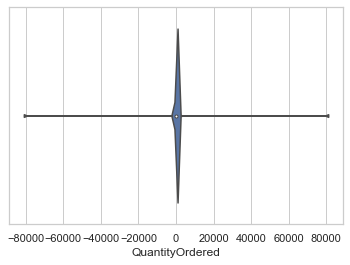

In [13]:
# viloinplot to chech negative values for quantity
sns.violinplot(x=df['QuantityOrdered'])

In [14]:
# check quantity ordered with negative values
df[df.QuantityOrdered < 0].head()

,InvoiceNo,StockCode,Description,QuantityOrdered,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,day_of_week,Hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,2010-12,Wednesday,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010-12,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12,Wednesday,10


1. There are some special StockCode like D means Discount and M means Manual.
2. When QuantityOrdered is negative, InvoiceNo starts with C, it could mean order is canceled. 

I'm going to analyze the QuantityOrderd with negative values instead of removing them.

In [15]:
## split order canceled data from original data 
df_OrderCanceled = df[df.QuantityOrdered < 0]
df_OrderCanceled.head()

,InvoiceNo,StockCode,Description,QuantityOrdered,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,day_of_week,Hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,2010-12,Wednesday,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010-12,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12,Wednesday,10


In [49]:
## add column Sales(Revenue)
df.loc[df.QuantityOrdered > 0, 'Sales'] = df['QuantityOrdered'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,QuantityOrdered,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,day_of_week,Hour,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,Wednesday,8,20.34


# Sales Made by Each Customer

In [48]:
# the number of sales made per customer each country
# change invoiceNO as NumberOfSales 
sales_by_customer = df.groupby(['CustomerID','Country'],as_index = False)['InvoiceNo'].count().sort_values(
    by='InvoiceNo',ascending=False)
sales_by_customer.columns = ['CustomerID','Country','NumberOfSales']
sales_by_customer.head(7)

,CustomerID,Country,NumberOfSales
4050,17841,United Kingdom,7983
1903,14911,EIRE,5903
1308,14096,United Kingdom,5128
338,12748,United Kingdom,4642
1682,14606,United Kingdom,2782
2200,15311,United Kingdom,2491
1711,14646,Netherlands,2085


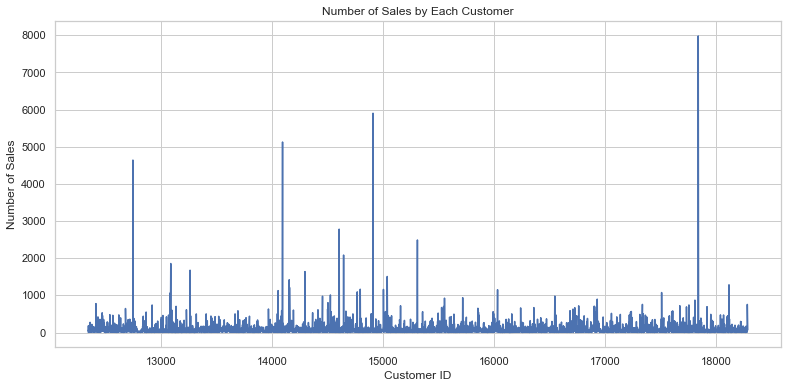

In [55]:
# Visualize sales by per customer
No_sales = df.groupby(['CustomerID','Country'],as_index=False)['InvoiceNo'].count()
plt.figure(figsize = (13,6))
plt.plot(No_sales.CustomerID,No_sales.InvoiceNo)
plt.xlabel('Customer ID')
plt.ylabel('Number of Sales')
plt.title('Number of Sales by Each Customer')
plt.show()

In [19]:
# revenue (amount spent by each customer)
spent_per_cus = df.groupby(['CustomerID','Country'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
spent_per_cus.head()                                                       

,CustomerID,Country,Sales
1711,14646,Netherlands,280206.02
4241,18102,United Kingdom,259657.30
3766,17450,United Kingdom,194550.79
3041,16446,United Kingdom,168472.50
1903,14911,EIRE,143825.06


# Quantity of orders and canceled orders for each month

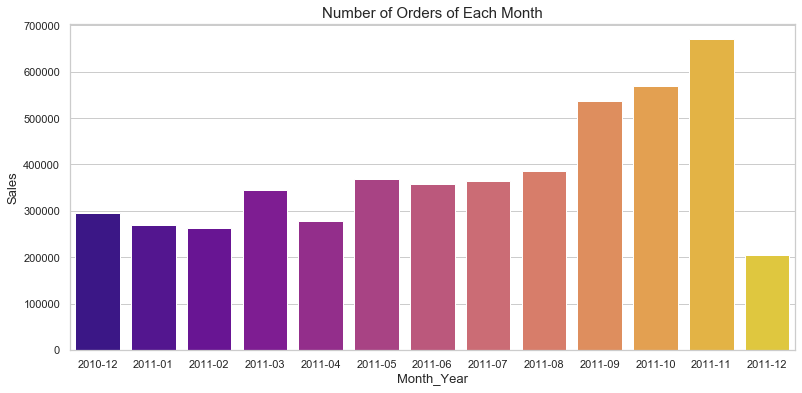

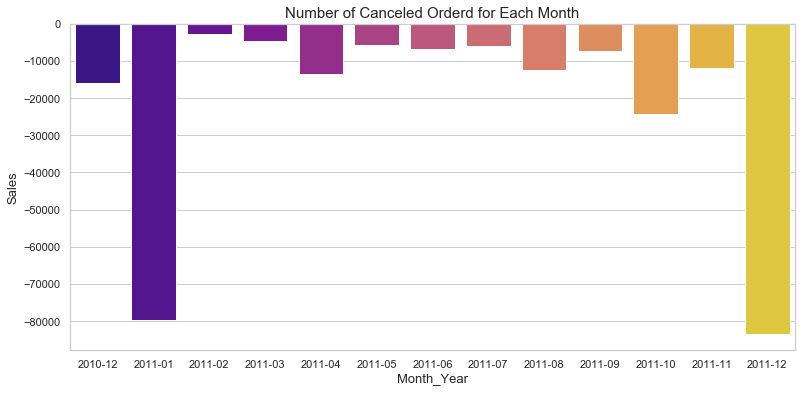

In [52]:
##what are the months have most orders?
result = df.groupby('Month_Year')['QuantityOrdered'].sum()
plt.figure(figsize = (13,6))
sns.barplot(data = df, x = result.index, y = result.values, palette = 'plasma')
plt.xlabel('Month_Year', size = 13)
plt.ylabel('Sales', size = 13)
plt.title('Number of Orders of Each Month',size=15)
plt.show()

## what are the months have most canceled orders?
result = df_OrderCanceled.groupby('Month_Year')['QuantityOrdered'].sum()
plt.figure(figsize = (13,6))
sns.barplot(data = df, x = result.index, y = result.values, palette = 'plasma')
plt.xlabel('Month_Year', size = 13)
plt.ylabel('Sales', size = 13)
plt.title('Number of Canceled Orderd for Each Month', size = 15)
plt.show()

# Ordered Quantity of Top 6 products in Italy and UK

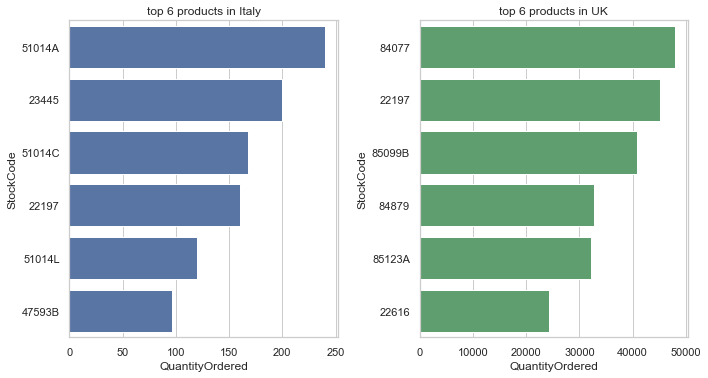

In [54]:
## products were ordered the most in Italy, UK
plt.subplots(figsize = (10,10))

subplot(2,2,1)
order_I = df[df['Country'] == 'Italy'].groupby('StockCode')['QuantityOrdered'].sum().sort_values(ascending = False)
sns.barplot(data = df, x = order_I[:6], y = order_I.index[:6], color = 'b')
plt.title('top 6 products in Italy')

subplot(2,2,2)
order_UK = df[df['Country'] == 'United Kingdom'].groupby('StockCode')['QuantityOrdered'].sum().sort_values(ascending = False)
order_UK.head(10)
sns.barplot(data = df, x = order_UK[:6], y = order_UK.index[:6], color = 'g')
plt.title('top 6 products in UK')

plt.tight_layout()

# Revenue Analysis 

In [21]:
df.groupby('day_of_week')['Sales'].sum().sort_values()

day_of_week
Sunday        792514.221
Monday       1367146.411
Friday       1485917.401
Wednesday    1588336.170
Tuesday      1700634.631
Thursday     1976859.070
Name: Sales, dtype: float64

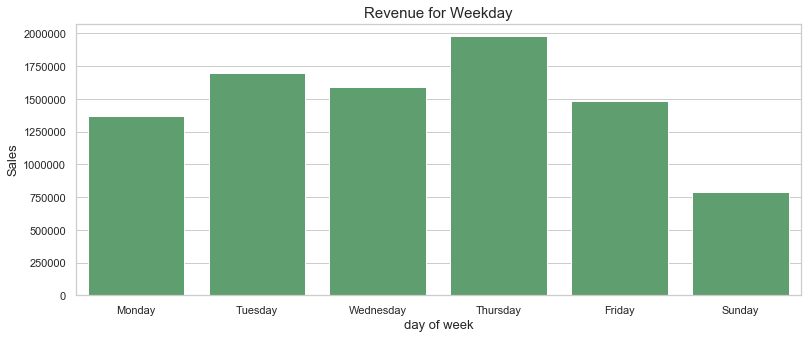

In [56]:
##which weekday has the most sales? which day has the least sales?
week_sale = df.groupby('day_of_week')['Sales'].sum()
plt.figure(figsize = (13,5))
sns.barplot(data = df, x = week_sale.index, y = week_sale.values, color = 'g',
            order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Sunday'])
plt.xlabel('day of week', size = 13)
plt.ylabel('Sales', size = 13)
plt.title('Revenue for Weekday', size = 15)
plt.show()

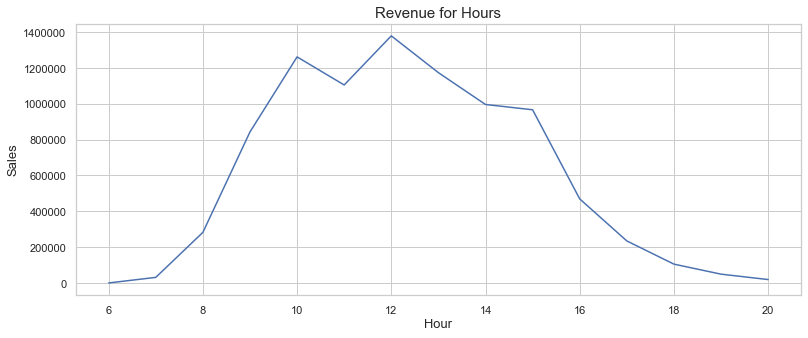

In [23]:
## revenue per hour
hr_sale = df.groupby('Hour')['Sales'].sum()
plt.figure(figsize = (13,5))
sns.lineplot(data = df, x = hr_sale.index, y = hr_sale.values, color = 'b')
plt.xlabel('Hour', size = 13)
plt.ylabel('Sales', size = 13)
plt.title('Revenue for Hours', size = 15)
plt.show()

In [24]:
top_orders = df[df['Month_Year'] == '2011-11'].groupby('Description').agg({ 'QuantityOrdered': 'sum', 'UnitPrice': 'first'}).sort_values(by = 'QuantityOrdered', ascending = False).head(10)
top_orders

,QuantityOrdered,UnitPrice
Description,,
ASSTD DESIGN 3D PAPER STICKERS,12551,0.85
RABBIT NIGHT LIGHT,12322,2.08
POPCORN HOLDER,8157,0.85
PAPER CHAIN KIT 50'S CHRISTMAS,5879,2.95
JUMBO BAG RED RETROSPOT,5576,2.08
ASSORTED COLOUR BIRD ORNAMENT,5190,1.69
WOODEN STAR CHRISTMAS SCANDINAVIAN,4980,0.29
WHITE HANGING HEART T-LIGHT HOLDER,4855,2.95
WOODEN HEART CHRISTMAS SCANDINAVIAN,4582,0.29


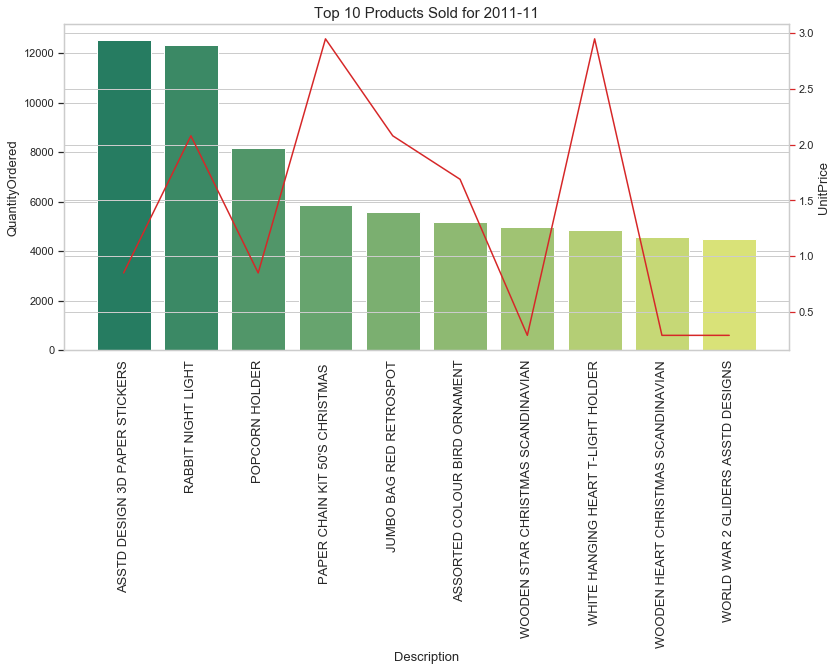

In [25]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(13,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Top 10 Products Sold for 2011-11', fontsize=15)
ax1.set_xlabel('Product Description', fontsize=13)
ax1.set_ylabel('Quantity Ordered', fontsize=13)
ax1 = sns.barplot(x=top_orders.index, y=top_orders.QuantityOrdered, data = df, palette='summer')
ax1.set_xticklabels(top_orders.index, rotation = 90, size=13)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Unit Price', fontsize=13)
ax2 = sns.lineplot(x=top_orders.index, y=top_orders.UnitPrice, data = df, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()


In [26]:
## Number of Orders in different countries
orders_of_countries = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending = False)
orders_of_countries.head(10)

Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: InvoiceNo, dtype: int64

In [27]:
##orders without UK
orders_of_countries = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending = False)
del orders_of_countries['United Kingdom']
orders_of_countries.head()

Country
Germany        9495
France         8491
EIRE           7485
Spain          2533
Netherlands    2371
Name: InvoiceNo, dtype: int64

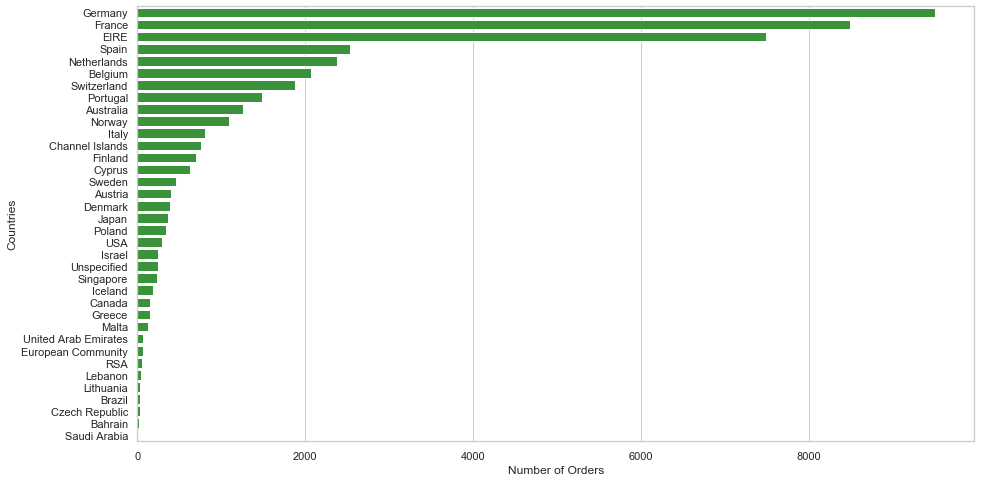

In [28]:
plt.figure(figsize = (15,8))
sns.barplot(data = df, x = orders_of_countries.values, y = orders_of_countries.index, color = 'tab:green')
plt.xlabel('Number of Orders')
plt.ylabel('Countries')
plt.show()

# Unit Price and Free Item Analysis

In [30]:
# analyze unit price 
df.UnitPrice.describe()

count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

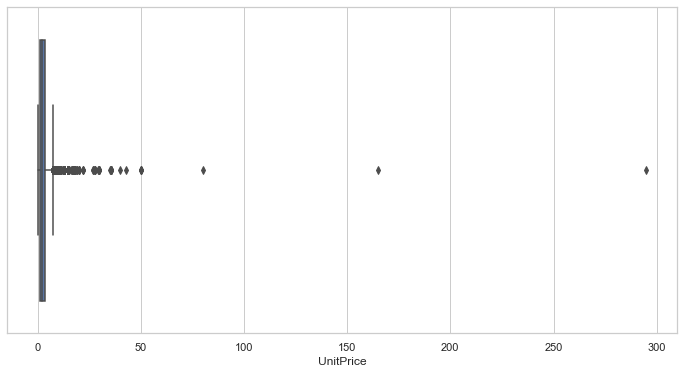

In [31]:
# check the distribution of unit price
plt.figure(figsize=(12,6))
sns.boxplot(df.UnitPrice[:10000])
plt.show()

In [32]:
# what are free items
df_free = df[df.UnitPrice == 0]
print(len(df_free))
df_free.head()

40


,InvoiceNo,StockCode,Description,QuantityOrdered,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,day_of_week,Hour,Sales
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,2010-12,Sunday,14,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,2010-12,Thursday,14,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,2010-12,Tuesday,13,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,2011-01,Thursday,16,0.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,2011-01,Thursday,16,0.0


In [33]:
# when were free itmes given out
df_free.Month_Year.value_counts().sort_values()

2011-02     1
2011-09     2
2011-07     2
2011-05     2
2011-04     2
2011-03     2
2011-10     3
2011-01     3
2010-12     3
2011-08     6
2011-11    14
Freq: M, Name: Month_Year, dtype: int64

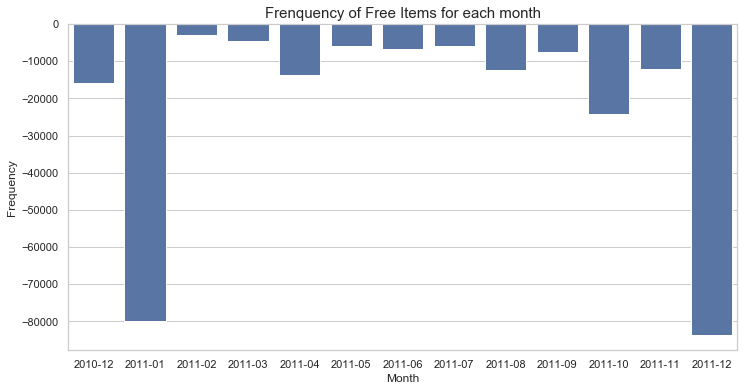

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x=result.index, y=result.values,color='b')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frenquency of Free Items for each month',size=15)
plt.show()

# Repeat Customer Analysis

In [35]:
# date range 
print('Date range: %s to %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [36]:
invoice_cus = df.groupby(['InvoiceNo','InvoiceDate'],as_index=False).agg({
    'Sales':'sum','CustomerID':'min','Country':'min'})
invoice_cus.head() 

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [37]:
#sort on sales
invoice_cus.sort_values('Sales',ascending=False).head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
18533,581483,2011-12-09 09:15:00,168469.60,16446,United Kingdom
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia


In [38]:
#repeat customer: customer ordered more than once in a same month
#Grouper(freq='M') group data by index'InvoiceDate' by Month
#count the number of unique repeat customers for the month
#lambda function len(x)>1, repeat customer
monthly_repeat_customer = invoice_cus.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'),'CustomerID']).filter(lambda x: len(x)>1).resample('M').nunique()['CustomerID']
monthly_repeat_customer

InvoiceDate
2010-12-31    357
2011-01-31    256
2011-02-28    246
2011-03-31    323
2011-04-30    271
2011-05-31    398
2011-06-30    333
2011-07-31    327
2011-08-31    299
2011-09-30    400
2011-10-31    446
2011-11-30    674
2011-12-31    150
Freq: M, Name: CustomerID, dtype: int64

In [39]:
# all the customer that ordered at least once in each month
monthly_unique_customer = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customer

InvoiceDate
2010-12-31     948
2011-01-31     783
2011-02-28     798
2011-03-31    1020
2011-04-30     899
2011-05-31    1079
2011-06-30    1051
2011-07-31     993
2011-08-31     980
2011-09-30    1302
2011-10-31    1425
2011-11-30    1711
2011-12-31     686
Freq: M, Name: CustomerID, dtype: int64

In [40]:
#ratio of repeat customer
monthly_repeat_percent = monthly_repeat_customer/monthly_unique_customer * 100
monthly_repeat_percent

InvoiceDate
2010-12-31    37.658228
2011-01-31    32.694764
2011-02-28    30.827068
2011-03-31    31.666667
2011-04-30    30.144605
2011-05-31    36.886006
2011-06-30    31.684110
2011-07-31    32.930514
2011-08-31    30.510204
2011-09-30    30.721966
2011-10-31    31.298246
2011-11-30    39.392168
2011-12-31    21.865889
Freq: M, Name: CustomerID, dtype: float64

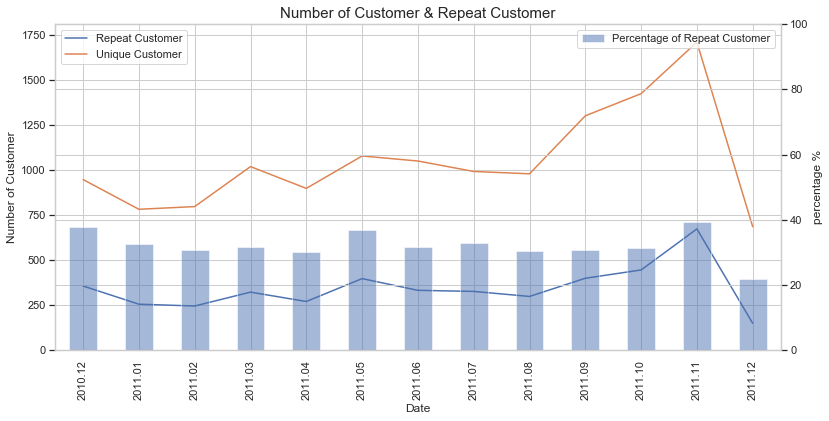

In [41]:
ax = pd.DataFrame(monthly_repeat_customer.values).plot(figsize=(13,6))
pd.DataFrame(monthly_unique_customer.values).plot(ax=ax)

ax2 = pd.DataFrame(monthly_repeat_percent.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='b',alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customer')
ax.set_title('Number of Customer & Repeat Customer',size=15)

ax2.set_ylabel('percentage %')

ax.legend(['Repeat Customer','Unique Customer'])
ax2.legend(['Percentage of Repeat Customer'])

ax.set_ylim([0,monthly_unique_customer.values.max()+100])
ax2.set_ylim([0,100])

plt.xticks(range(len(monthly_repeat_customer.index)),[x.strftime('%Y.%m') for x in monthly_repeat_customer.index])

plt.show()

In [47]:
# relationship between repeat customers and revenue
monthly_repeat_customer = invoice_cus.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'),'CustomerID']).filter(lambda x: len(x)>1).resample('M').sum()['Sales']

monthly_revenue = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

# percentage of revenue from repeat customer
monthly_revenue_repeat_cus_percent = monthly_repeat_customer / monthly_revenue * 100
monthly_revenue_repeat_cus_percent

InvoiceDate
2010-12-31    69.208761
2011-01-31    62.066641
2011-02-28    51.593201
2011-03-31    57.189077
2011-04-30    55.163169
2011-05-31    64.044080
2011-06-30    64.397699
2011-07-31    60.391604
2011-08-31    58.091681
2011-09-30    60.300125
2011-10-31    61.797304
2011-11-30    66.590979
2011-12-31    65.694009
Freq: M, Name: Sales, dtype: float64

# Item Analysis

In [88]:
# Quantity of each item sold by month
date_item = df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'StockCode'])['QuantityOrdered'].sum()
date_item.head()

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
Name: QuantityOrdered, dtype: int64

In [89]:
# rank items by last month sale
last_month_sale = date_item.loc['2011-11-30'].reset_index().sort_values(by='QuantityOrdered',ascending=False)
last_month_sale.head()

,InvoiceDate,StockCode,QuantityOrdered
2377,2011-11-30,84826,12551
1572,2011-11-30,23084,12322
830,2011-11-30,22197,8157
741,2011-11-30,22086,5879
2495,2011-11-30,85099B,5576


In [90]:
# top 5 items Order Quantity by each month
date_item = df.loc[df['StockCode'].isin(['84826','23084','22197','22086','85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'),'StockCode'])['QuantityOrdered'].sum()
date_item.head()

InvoiceDate  StockCode
2010-12-31   22086        1690
             22197        2103
             84826         306
             85099B       2030
2011-01-31   22197        1682
Name: QuantityOrdered, dtype: int64

In [95]:
# generate monthly trend of top 5 items 
trend_items = date_item.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
trend_items = trend_items.reset_index()
trend_items = trend_items.set_index('InvoiceDate')

trend_items.columns = trend_items.columns.droplevel(0)
trend_items.head()

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,1690.0,2103.0,0.0,306.0,2030.0
2011-01-31,0.0,1682.0,0.0,480.0,2517.0
2011-02-28,2.0,2502.0,0.0,66.0,2969.0
2011-03-31,85.0,2029.0,0.0,60.0,4923.0
2011-04-30,-29.0,1788.0,0.0,1.0,2207.0


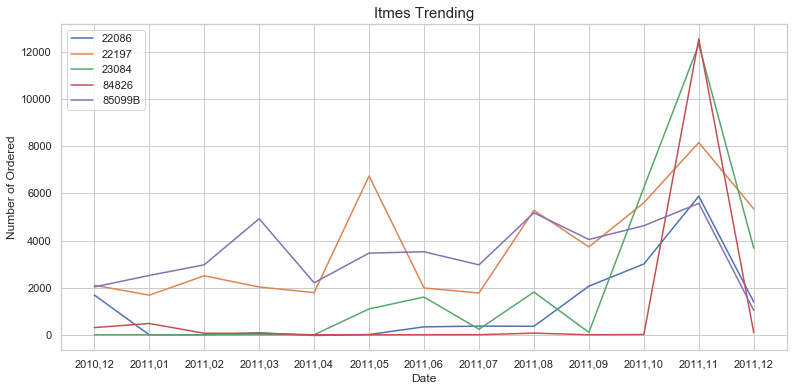

In [96]:
# Visualization
ax = pd.DataFrame(trend_items.values).plot(figsize=(13,6),grid=True)
plt.xticks(range(len(trend_items.index)),[x.strftime('%Y,%m') for x in trend_items.index])
ax.set_xlabel('Date')
ax.set_ylabel('Number of Ordered')
ax.set_title('Itmes Trending',size=15)
ax.legend(trend_items.columns)
plt.show()